# X-Ray Image Classification Project

### <u>Objective:</u>

***The aim of the project is to develop a Convolutional Neural Network (CNN) for image classification and use it to detect Pneumonia cases from chest X-ray images***

**Dataset used in this Notebook is available for download from:** https://www.kaggle.com/datasets/tolgadincer/labeled-chest-xray-images

In [60]:
import os
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import Adam
from keras.callbacks import EarlyStopping

from sklearn.metrics import confusion_matrix

In [2]:
tf.get_logger().setLevel('ERROR')

In [6]:
def test_sample_batch(iterator):
    """
    Function to yield the next batch from the DirectoryIterator and output the shape of input and labels
    """
    
    sample_input_batch, sample_labels_batch = iterator.next()
    
    print(f'Sample input shape: {sample_input_batch.shape}, sample labels shape: {sample_labels_batch.shape}')
    
    _plotImages(sample_input_batch)  # Output the images stored in the batch
    print(sample_labels_batch)  # Print the corresponding labels

In [54]:
def _plotImages(img_batch):
    fig, axes = plt.subplots(6, 4, figsize=(30, 30))
    axes = axes.flatten()
    for img, ax in zip(img_batch, axes):
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

In [35]:
def create_model(input_shape, name='sequential'):
    model = Sequential(name=name)
    
    # Add Input Layer
    model.add(tf.keras.Input(shape=input_shape))
    
    # Add Convolutional Layer(s)
    model.add(Conv2D(filters=4, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2))
    model.add(Conv2D(filters=8, kernel_size=(3,3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2,2), strides=2))
    
    # Flatten to 1D 
    model.add(Flatten())
    
    # Add Output Layer
    model.add(Dense(units=2, activation='softmax'))
    
    return model

In [62]:
def main():
    TRAIN_DIRECTORY = './Datasets/pneumonia_xray/train'
    TEST_DIRECTORY = './Datasets/pneumonia_xray/test'
    
    BATCH_SIZE = 24
    TARGET_SIZE = (240, 240)
    CLASS_MODE = 'categorical'
    COLOR_MODE = 'grayscale'
    
    # Load the image data into a Generator object in batch sizes of BATCH_SIZE
    generator = ImageDataGenerator(rescale=1./255, validation_split=0.2, zoom_range=0.2, horizontal_flip=True)
    test_generator = ImageDataGenerator(rescale=1./255)
    
    training_iterator = generator.flow_from_directory(TRAIN_DIRECTORY,
                                                      subset='training',
                                                      batch_size=BATCH_SIZE,
                                                      target_size=TARGET_SIZE,
                                                      class_mode=CLASS_MODE,
                                                      color_mode=COLOR_MODE)
    
    validation_iterator = generator.flow_from_directory(TRAIN_DIRECTORY,
                                                      subset='validation',
                                                      batch_size=BATCH_SIZE,
                                                      target_size=TARGET_SIZE,
                                                      class_mode=CLASS_MODE,
                                                      color_mode=COLOR_MODE)
    
    testing_iterator = test_generator.flow_from_directory(TEST_DIRECTORY,
                                                        batch_size=BATCH_SIZE,
                                                        target_size=TARGET_SIZE,
                                                        class_mode=CLASS_MODE,
                                                        color_mode=COLOR_MODE,
                                                        shuffle=False)
    
    # Test the images loaded in to the training iterator
    test_sample_batch(training_iterator)
    
    # Initialize the model
    model = create_model((240, 240, 1))
    model.summary()
    
    # Compile and train the model
    model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])
    model.fit(training_iterator, validation_data=validation_iterator, epochs=10, verbose=2,
             callbacks=[EarlyStopping(monitor='val_accuracy', patience=3)])
    
    # Test the images loaded in to the testing iterator
    test_sample_batch(testing_iterator)
    
    # Show the accuracy of the model on the test images
    test_loss, test_acc = model.evaluate(testing_iterator)
    print(f'Model accuracy on test data: {test_acc}')
    
    # Make predictions on the test data using the model
    model_predictions = model.predict(testing_iterator, verbose=0)
    
    # Output predictions made by the model
    np.round(model_predictions)  # Round predictions to 1 or 0
    
    # Create and visualize a confusion matrix of prediction breakdown
    cm = confusion_matrix(y_true=testing_iterator.classes, y_pred=np.argmax(model_predictions, axis=-1))
    sns.heatmap(cm, annot=True, fmt='d')

Found 4187 images belonging to 2 classes.
Found 1045 images belonging to 2 classes.
Found 624 images belonging to 2 classes.
Sample input shape: (24, 240, 240, 1), sample labels shape: (24, 2)


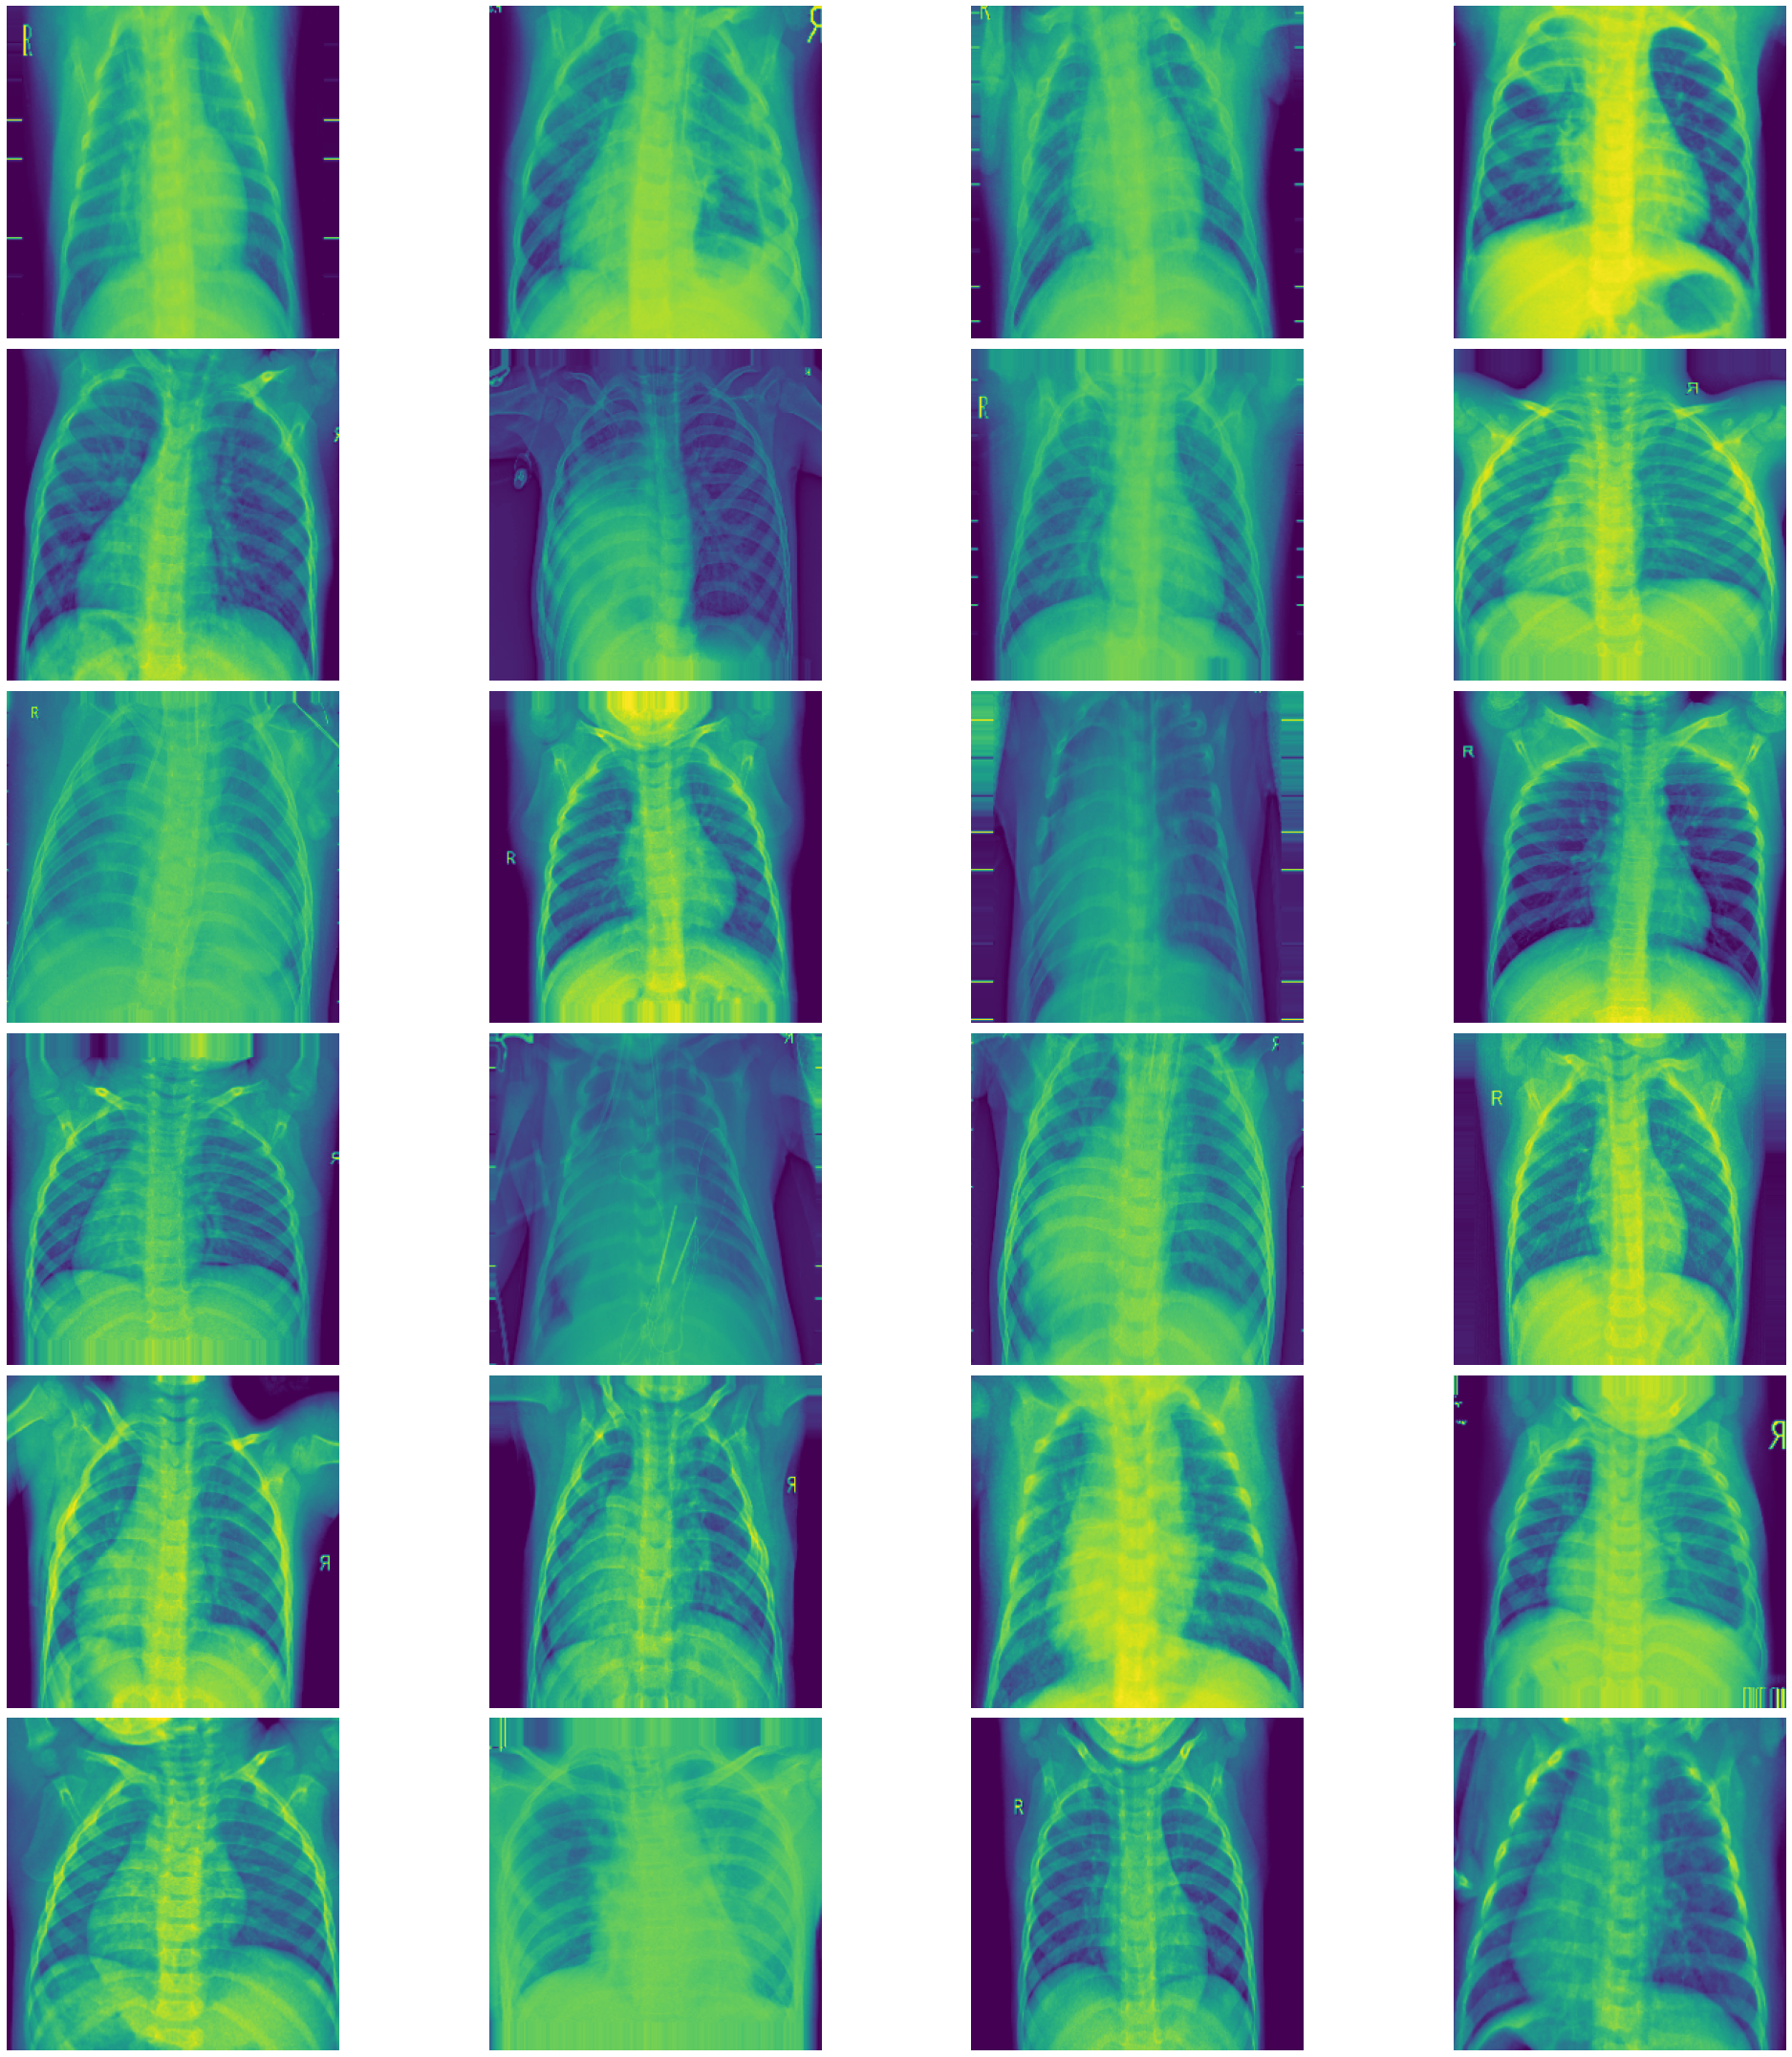

[[0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]]
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_16 (Conv2D)          (None, 240, 240, 4)       40        
                                                                 
 max_pooling2d_16 (MaxPoolin  (None, 120, 120, 4)      0         
 g2D)                                                            
                                                                 
 conv2d_17 (Conv2D)          (None, 120, 120, 8)       296       
                                                                 
 max_pooling2d_17 (MaxPoolin  (None, 60, 60, 8)        0         
 g2D)                                                            
                                     

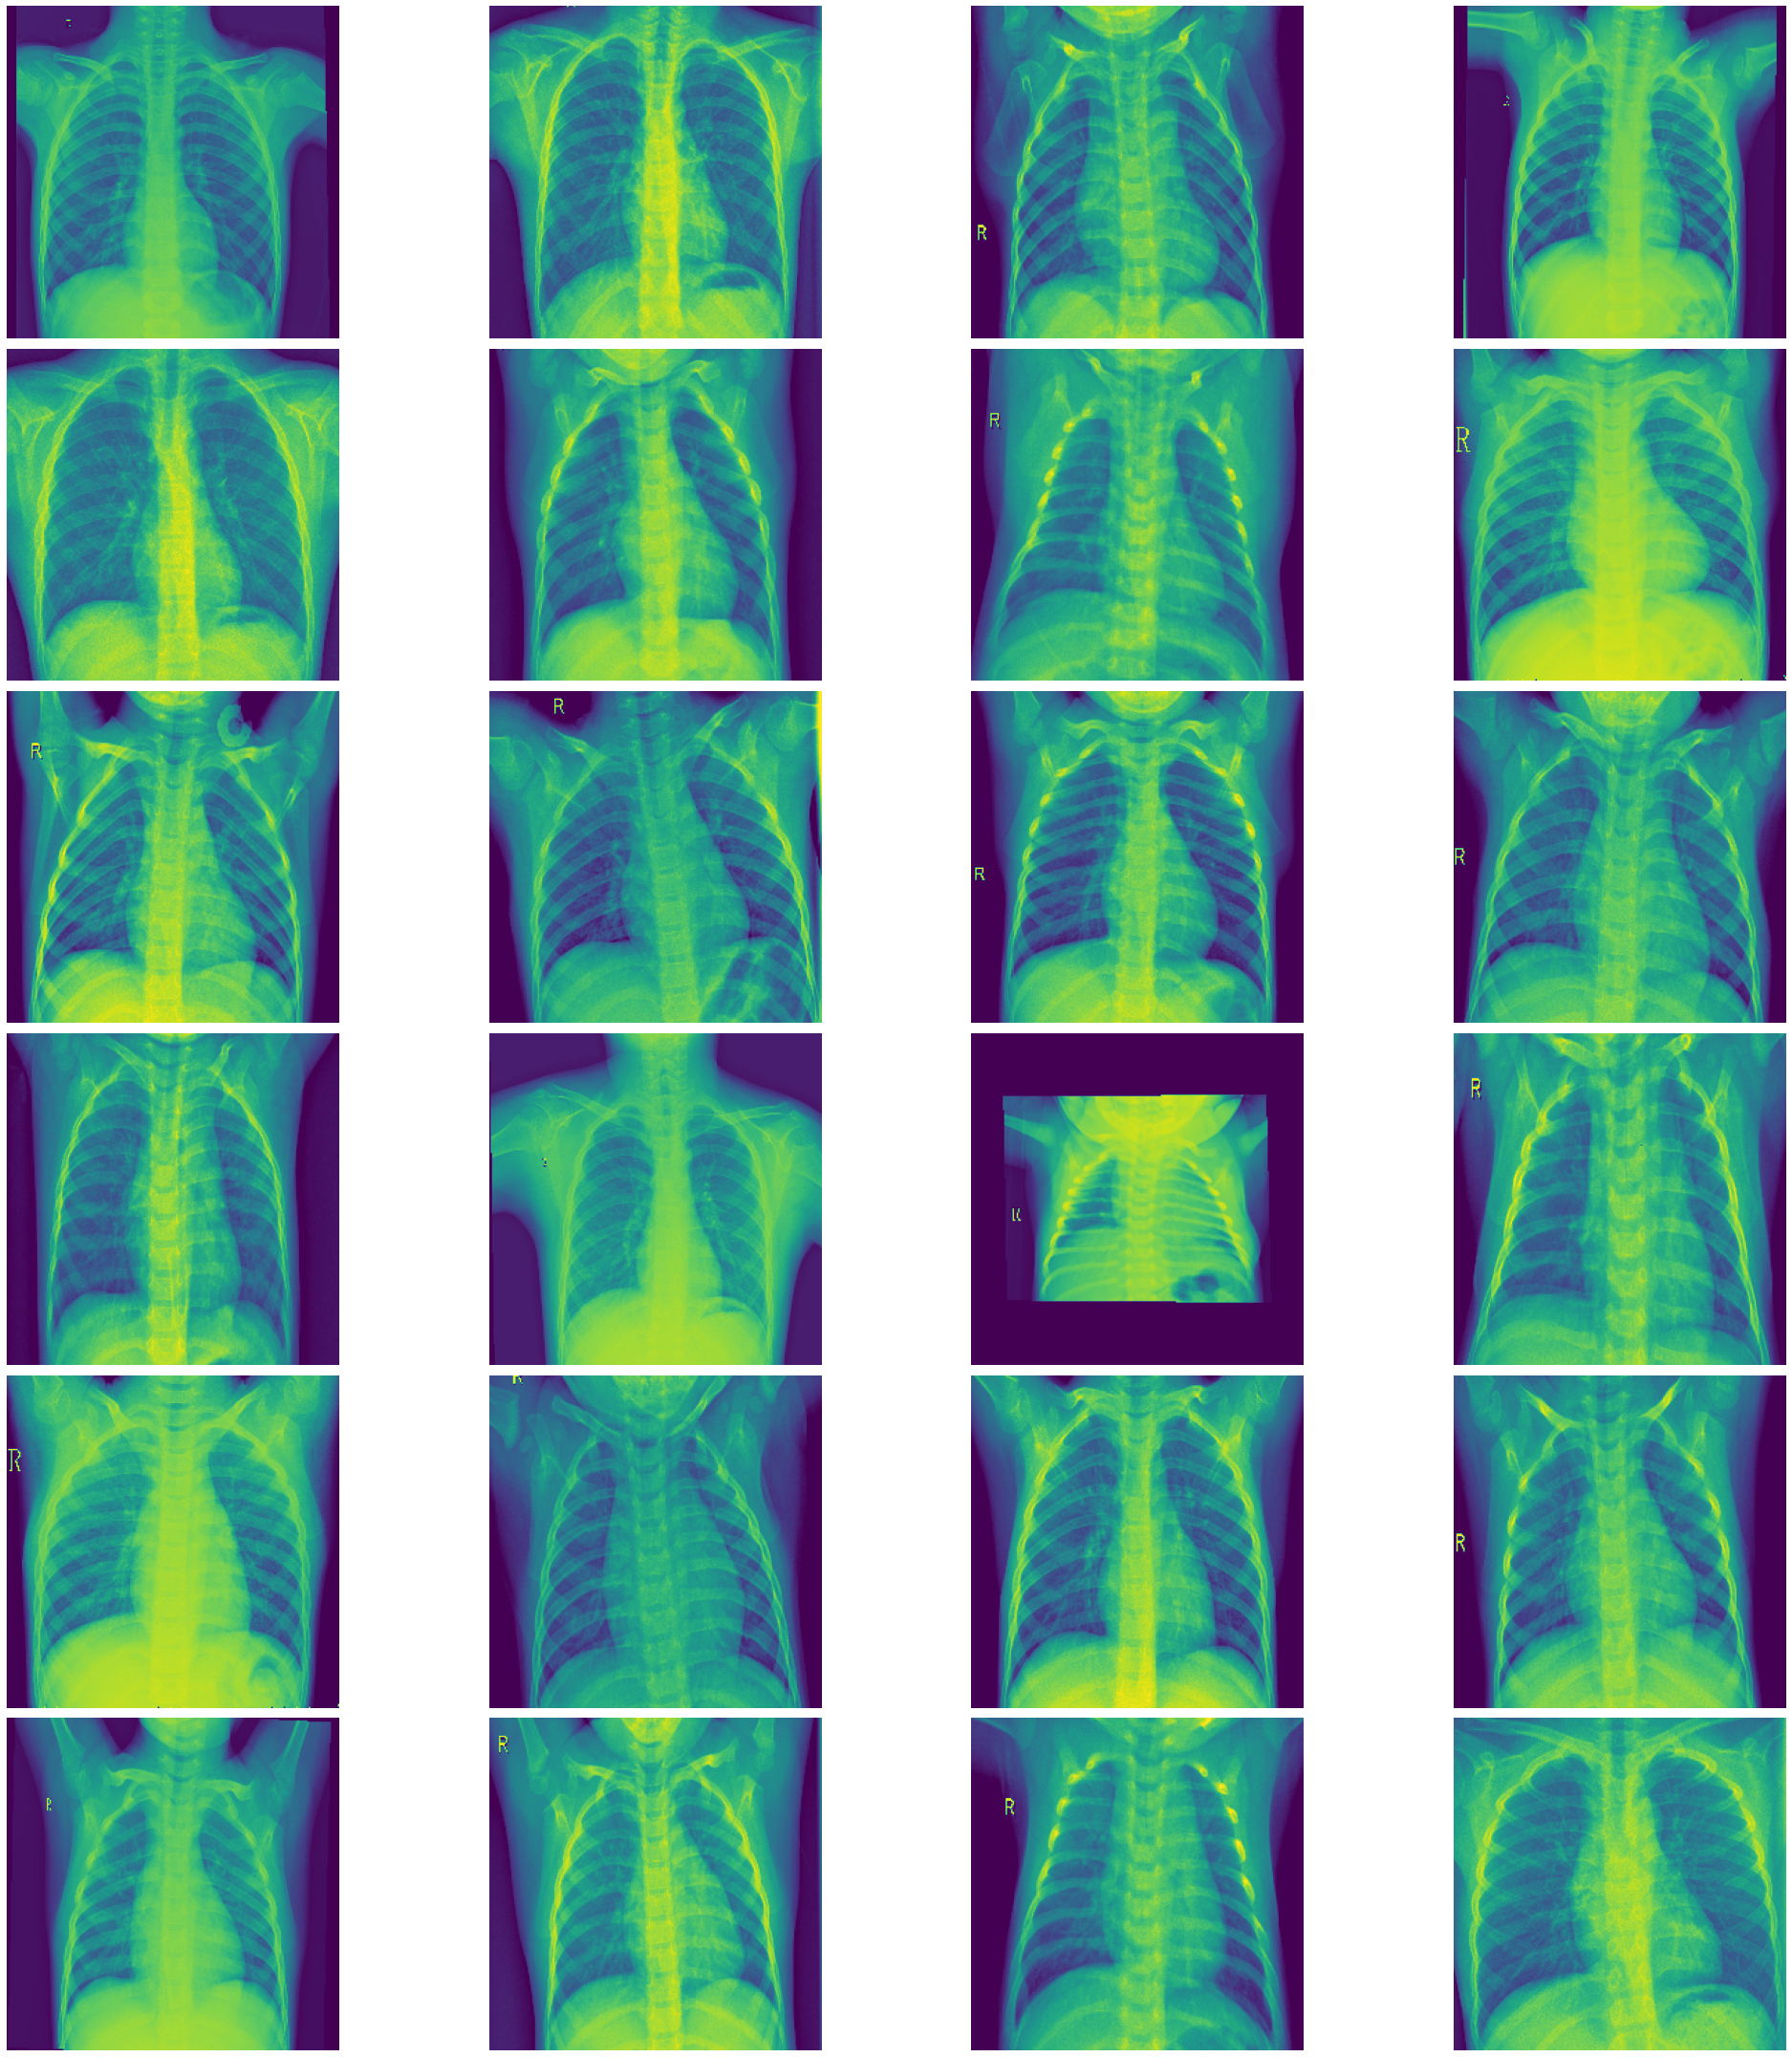

[[1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]]
26/26 [==============================] - 4s 146ms/step - loss: 0.2284 - accuracy: 0.9119
Model accuracy on test data: 0.9118589758872986


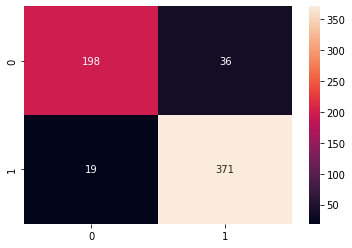

In [63]:
if __name__ == '__main__':
    main()